Enter The Keyword:Nisarg
Positive tweets percentage: 26.923076923076923 %
Negative tweets percentage: 9.615384615384615 %
Neutral tweets percentage: 63.46153846153846 %
Pie-Chart representation:



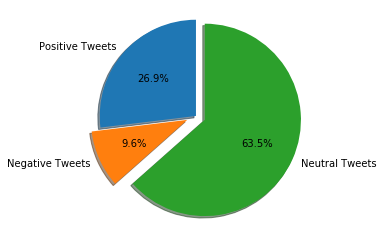

<Figure size 432x288 with 0 Axes>

In [11]:
import re 
import tweepy 
from tweepy import OAuthHandler 
from textblob import TextBlob 
import matplotlib.pyplot as plt
query = input("Enter The Keyword:")

class TwitterClient(object): 

	def __init__(self): 

		consumer_key = 'Hi0hmJvJcUUxmtl0XL5tp0mjG'
		consumer_secret = 'ce2U4Czd05cKJpURhhCwVqACoW7u27wfcYvbE4fESPQdt0NMq7'
		access_token = '707077794455429120-WB1PlMIomZOXkS4kB6gz0itt76ETlnc'
		access_token_secret = 'XY0JoWthhpg6bWZ6zsgiQHKEJkx0TtjEaZuNjUiyV1umb'

		try: 
			self.auth = OAuthHandler(consumer_key, consumer_secret) 
			self.auth.set_access_token(access_token, access_token_secret) 
			self.api = tweepy.API(self.auth) 
		except: 
			print("Error: Authentication Failed") 

	def clean_tweet(self, tweet): 

		return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split()) 

	def get_tweet_sentiment(self, tweet): 

		analysis = TextBlob(self.clean_tweet(tweet)) 

		if analysis.sentiment.polarity > 0: 
			return 'positive'
		elif analysis.sentiment.polarity == 0: 
			return 'neutral'
		else: 
			return 'negative'

	def get_tweets(self, query, count = 10): 

		tweets = [] 

		try: 

			fetched_tweets = self.api.search(q = query, count = count) 
			for tweet in fetched_tweets: 

				parsed_tweet = {} 
				parsed_tweet['text'] = tweet.text 
				parsed_tweet['sentiment'] = self.get_tweet_sentiment(tweet.text) 

				if tweet.retweet_count > 0: 
					if parsed_tweet not in tweets: 
						tweets.append(parsed_tweet) 
				else: 
					tweets.append(parsed_tweet) 

			return tweets 

		except tweepy.TweepError as e: 
			print("Error : " + str(e)) 

def main(): 

	api = TwitterClient() 
	tweets = api.get_tweets(query, count = 500) 


	ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive']  
	print("Positive tweets percentage: {} %".format(100*len(ptweets)/len(tweets))) 
	ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative'] 
	print("Negative tweets percentage: {} %".format(100*len(ntweets)/len(tweets))) 
	print("Neutral tweets percentage: {} %".format(100*(len(tweets) - len(ntweets) - len(ptweets))/len(tweets))) 
	ptweetspie=100*len(ptweets)/len(tweets)
	ntweetspie=100*len(ntweets)/len(tweets)
	neutraltweetspie = 100*(len(tweets) - len(ntweets) - len(ptweets))/len(tweets)
	sizes = [ptweetspie, ntweetspie, neutraltweetspie]
	labels = 'Positive Tweets', 'Negative Tweets', 'Neutral Tweets'
	explode = (0, 0.1, 0.1)
	fig1, ax1 = plt.subplots()
	ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
	ax1.axis('equal')  
	print("Pie-Chart representation:\n")
	plt.show()
	plt.savefig('pie.jpeg')

if __name__ == "__main__": 

	main() 
    
    
    
